# About

This notebook includes the `python` for reading the web logs for NIST Technical Series Publications and displaying the usage in a simple table that allows searching of any of the cells, e.g., searching `sp.1800-15` filters only the hits and visitors for that publication. It's built using [ITables](https://mwouts.github.io/itables/quick_start.html), which has the MIT License. More information on our use case, including a video, can be found at [https://pages.nist.gov/NIST-Tech-Pubs/downloads/](https://pages.nist.gov/NIST-Tech-Pubs/downloads/).




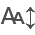

In [36]:
# imports and initializes libraries
import pandas as pd
from itables import init_notebook_mode, show

init_notebook_mode()

In [38]:
# reads a csv file into the DataFrame with specified columns
df = pd.read_csv('./csv/fy2024.csv',
                 names=['number', 'none', 'type', 'hits', 'hits%', 'visitors', 'visitors%', 'bytes', 'bytes%', 'ms-avg', 'ms-cm', 'ms-max', 'method', 'null', 'file'])

# drops unnecessary columns
df = df.drop(columns=['number', 'none', 'type', 'hits%', 'visitors%', 'bytes', 'bytes%', 'ms-avg', 'ms-cm', 'ms-max', 'method', 'null'])

# normalize file names to lowercase
df['file'] = df['file'].str.lower()

# groups by 'file' and sums 'hits' and 'visitors'
df_grouped = df.groupby('file', as_index=False).agg({'hits': 'sum', 'visitors': 'sum'})

# sorts the DataFrame by 'hits' in descending order
df_sorted = df_grouped.sort_values(by='hits', ascending=False)

# reorder columns to 'hits', 'visitors', 'file'
df_sorted = df_sorted[['hits', 'visitors', 'file']]

# shows DataFrame with 3 buttons for exporting the table, and some style, without the index column
show(df_sorted, maxBytes=0, buttons=['copyHtml5', 'csvHtml5', 'excelHtml5'], style="table-layout:auto;width:100%;float:center;", columnDefs=[{'targets': 0, 'visible': False}])